In [1]:
import python_speech_features as mfcc
import os
import numpy as np
import pandas as pd
import librosa
import pickle

#df_features = pd.read_csv('./mfcc_es_mx.csv')
df_features = pd.read_csv('mfcc_features.csv')
df_features = df_features.drop(['Unnamed: 0'],axis=1)
df_features.accent.value_counts()

España             74992
México             15448
Andino             11699
Rioplatense        10621
Caribe              7661
América central     5565
Chileno             3918
Name: accent, dtype: int64

In [2]:
df_es = df_features[df_features['accent']=='España'][:7000]
df_mx = df_features[df_features['accent']=='México'][:7000]
#df_andino = df_features[df_features['accent']=='Andino'][:10000]
df_caribe = df_features[df_features['accent']=='Caribe'][:7000]
#df_rp = df_features[df_features['accent']=='Rioplatense'][:7000]

# Multi accent
#df_features = pd.concat([df_es,df_mx,df_andino,df_caribe,df_rp])
# España Mexico
#df_features = pd.concat([df_es,df_mx])

#España, Mexico, Andino
#df_features = pd.concat([df_es,df_mx,df_andino])

# España, Mexico, Caribe
#df_features = pd.concat([df_es,df_mx,df_caribe])

# España Andino
#df_features = pd.concat([df_es,df_andino])

#Mexico, Andino
#df_features = pd.concat([df_mx,df_andino])

# Mexico Caribe
#df_features = pd.concat([df_mx,df_caribe])

# Andino Caribe
#df_features = pd.concat([df_andino,df_caribe])

# Espana Mexico Caribe
df_features = pd.concat([df_es,df_mx,df_caribe])




In [3]:
df_features.head(10)

,accent,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
42,España,1216.382538,1568.610303,2587.845203,-412.54977,164.15321,10.811714,35.996063,20.960400,-3.951742,16.321898,-4.442511,-9.238402,6.424434,-7.643149,-2.012275,5.432637
43,España,1204.740294,1563.713198,2584.941484,-356.37290,161.04774,10.674234,31.827540,21.674076,-0.522736,16.786007,-2.670429,-7.622158,6.294351,-7.498704,-3.270926,4.291996
44,España,1211.749849,1535.340851,2584.845133,-357.59020,171.70476,4.096711,30.806465,22.208660,-0.630694,17.701578,-6.183653,-10.549369,6.147672,-9.595118,-3.783814,5.321981
45,España,1333.626880,1630.019835,2835.638552,-375.31876,168.57375,-0.170458,32.589230,18.115736,-6.452312,18.723833,-3.679100,-6.682271,11.162244,-6.382185,-0.588674,7.154757
46,España,1242.131205,1580.362146,2738.289579,-364.97780,170.42747,2.506090,30.310652,20.346739,-1.906285,18.171799,-7.320084,-12.224300,7.314763,-5.736323,0.481550,7.409584
47,España,1144.942403,1515.322378,2444.910386,-359.61404,167.35773,11.882568,32.476185,19.790130,-2.087313,16.281008,-5.700001,-9.444499,7.029036,-7.949900,-3.315798,6.065146
48,España,1265.416579,1497.048961,2617.632772,-344.76318,156.97676,17.757616,23.450539,19.649052,4.109625,11.760427,-8.253255,-11.271018,3.848936,-5.697726,-3.787262,2.806558
49,España,1305.428759,1542.658855,2714.817881,-357.01193,156.12563,16.186518,25.192966,16.110718,-0.016857,14.309950,-5.495898,-10.700159,3.932415,-6.168226,-2.400179,5.785211
50,España,1104.966033,1395.344261,2200.562701,-344.66400,174.65997,14.910989,30.377570,23.037080,3.696488,17.046590,-8.317203,-14.573174,2.801156,-7.979412,-4.059494,2.949890
78,España,1475.704378,1132.821543,2644.844487,-585.58673,124.65629,13.329678,-7.784389,13.048413,6.384330,-6.555654,-3.186260,-1.647206,-9.835999,-10.866629,-2.883593,-2.621841


In [4]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, 0]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[0])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: España

After encoding: 1

Classes: ['Caribe' 'España' 'México']


In [5]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 1:], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [6]:
import matplotlib.pyplot as plt

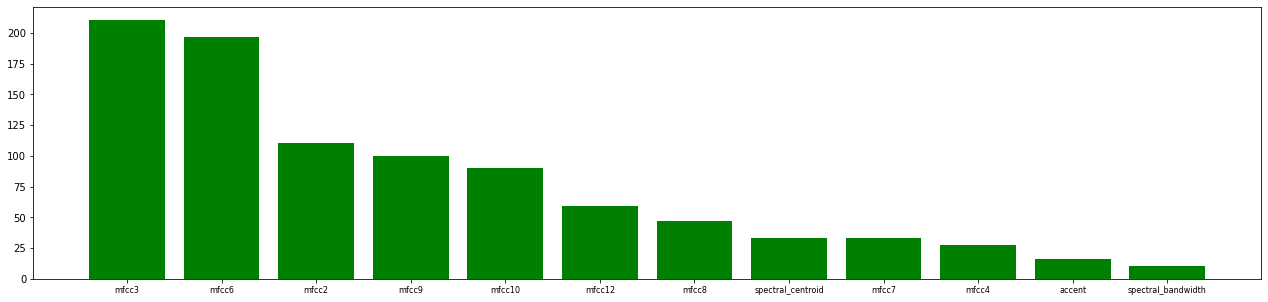

<Figure size 432x288 with 0 Axes>

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 12

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

plt.savefig('features.png')

In [8]:
x[0]

array([-1.29557202,  0.08028039, -0.99650872, -0.02345682,  1.3770983 ,
        0.84633831,  1.34499645,  0.08750644, -0.06711052,  1.00361531,
       -0.10164643, -0.26350656,  0.75438018, -0.09130986,  0.23723712,
        0.96682894])

In [9]:
X_new[0]

array([-1.29557202,  0.08028039, -0.99650872,  0.84633831,  1.34499645,
        0.08750644,  1.00361531, -0.10164643, -0.26350656,  0.75438018,
       -0.09130986,  0.96682894])

In [10]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale', probability = True)

# Classes: España, Mexico, Andino, Caribe, Rioplatense

#clf = OneVsOneClassifier(model,n_jobs=1)
clf = OneVsOneClassifier(model)
clf.fit(X_train, y_train)

#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)



OneVsOneClassifier(estimator=SVC(C=100, probability=True))

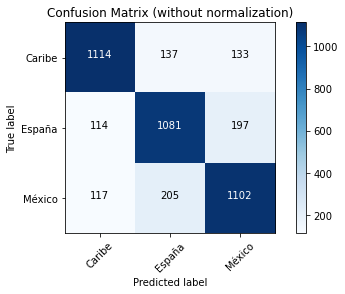

<Figure size 432x288 with 0 Axes>

In [12]:
y_pred = clf.predict(X_test)

#compare what we know is true with the prediction

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

plt.savefig('cm.png')

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.785

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


# Binarize ypreds with shape (n_samples, n_classes)
y_pred = label_binarize(y_pred, classes=[0,1,2])


roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

#roc_auc_score(y_test, y_pred , multi_class='ovo')

#roc_auc_score(y_test, y_pred)

0.8388425397655461

In [16]:
# Multiclass model using OVO Classifier SVM

# MULTI
# MULTI_OVO
# ES_MX_ANDINO

model_name = 'ES_MX_CARIBE_OVO'

model_path = './models/'+model_name+'/'

pickle.dump(encoder, open(model_path + 'encoder.pkl','wb'))
pickle.dump(scaler, open(model_path + 'scaler.pkl','wb'))
pickle.dump(f_selector, open(model_path + 'f_selector.pkl','wb'))
pickle.dump(clf, open(model_path + 'model.pkl','wb'))

We have to get the mfcc features when we want to make a new prediction. 
Be mindful that the feature selector should be applied to this new file, because it will keep only the relevant features.

Create a pipeline for new predictions

In [17]:
df_new_data = pd.read_csv('./preprocessed/train.csv')

In [18]:
ds_path = "./clips/"

train_csv = df_new_data

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000, mfcc_num=20):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    accents = train_csv[train_csv['path'] == filename].accents.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(accents)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    # Extract mfcc features. First experiment
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=mfcc_num) # it returns 20 by default.
    for el in mfcc:
        features.append(np.mean(el))
    
    return features

In [19]:
inx = 18765
df_new_data.iloc[inx]

Unnamed: 0                                                44613
client_id     0b7ae4a12ec82a5964a5e1bb271ea0106b65e34dc36c65...
path                               common_voice_es_19747165.wav
sentence      De nuevo, Crátero inició el asedio y Alejandro...
up_votes                                                      2
down_votes                                                    0
age                                                    fourties
gender                                                   female
accents                                                  México
locale                                                       es
segment                                                     NaN
Name: 18765, dtype: object

In [20]:
from IPython.display import Audio 
path = './clips/'+ df_new_data.iloc[inx]['path']

Audio(path, autoplay=True)

In [21]:
file_path = df_new_data.iloc[inx]['path']

file_features = feature_extraction(file_path,mfcc_num = 13)
print("features: ", file_features)

# This data needs to be scaled!!!!
# Next, use the feature selector transform


features:  ['México', 1884.622756923559, 1742.0640012319645, 3505.8549259681095, -353.76996, 116.289505, -11.551197, 8.730063, 2.543114, -8.989427, -3.0980225, -29.225952, -15.900945, 4.048154, -14.510168, -2.7871382, 3.3598535]


In [22]:

file_features = scaler.transform([file_features[1:]])

X_new_features = f_selector.transform(file_features)

X_new_features

array([[ 0.3470071 ,  0.83042534,  0.26654905, -0.24733729, -0.6265201 ,
        -1.69712942, -0.93809213, -3.3844759 , -1.21476783,  0.41785093,
        -1.23945726,  0.60422259]])

In [23]:
print(classes)
#model.predict(X_new_features)
prediction = clf.predict(X_new_features)

print(classes[prediction[0]])


['Caribe' 'España' 'México']
México


In [24]:
df_new_data.iloc[inx]['path']

'common_voice_es_19747165.wav'